In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, text

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///hawaii.sqlite")


In [5]:
# reflect an existing database into a new model
Base=automap_base()

# reflect the tables
Base.prepare(engine,reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement=Base.classes.measurement
Station=Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session=Session(engine)

In [9]:
engine.execute(text('SELECT* FROM measurement LIMIT 5')).fetchall()

[(0, 'USC00519397', '2010-01-01', 2.0, 18.3),
 (1, 'USC00519397', '2010-01-02', 0.0, 17.2),
 (2, 'USC00519397', '2010-01-03', 0.0, 23.3),
 (3, 'USC00519397', '2010-01-04', 0.0, 24.4),
 (4, 'USC00519397', '2010-01-06', None, 22.8)]

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23',)

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
most_recent=session.query(Measurement.date).order_by(Measurement.date.desc()).first()
# Calculate the date one year from the last date in data set.
query_date=dt.date(2017, 8, 23)-dt.timedelta(days=365)
print("Query date: ", query_date)
# Perform a query to retrieve the data and precipitation scores
date_prcp=session.query(Measurement.date,Measurement.prcp).filter(Measurement.date >= query_date).all()
date_prcp
# Save the query results as a Pandas DataFrame. Explicitly set the column names
df=pd.DataFrame(date_prcp)
df
# Sort DataFrame by date
df_sort=df.sort_values(['date'])

Query date:  2016-08-23


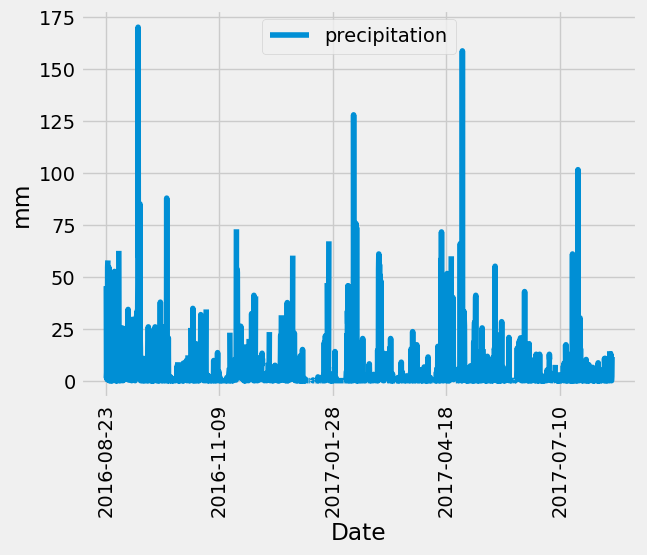

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
df_sort.plot.line(x='date',y='prcp')
plt.xticks(rotation=90)
plt.legend(['precipitation'])
plt.ylabel('mm')
plt.xlabel('Date')

plt.show()

In [13]:
# Use Pandas to calculate the summary statistics for the precipitation data
df_sort.describe()


,prcp
count,2021.000000
mean,4.505888
std,11.713487
min,0.000000
25%,0.000000
50%,0.500000
75%,3.300000
max,170.200000


# Exploratory Station Analysis

In [14]:
# Design a query to calculate the total number of stations in the dataset
session.query(Measurement.station).distinct().count()

9

In [15]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [16]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
sel=[func.min(Measurement.tobs),
     func.max(Measurement.tobs),
     func.avg(Measurement.tobs)]

stat_temp=session.query(*sel).filter((Measurement.station)=="USC00519281").all()
stat_temp

[(12.2, 29.4, 22.03582251082252)]

In [17]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
date_temp=session.query(Measurement.tobs).\
filter(Measurement.station=="USC00519281",Measurement.date >= query_date).all()
date_temp

[(25.0,),
 (25.0,),
 (26.7,),
 (26.7,),
 (23.9,),
 (22.8,),
 (25.6,),
 (25.0,),
 (25.6,),
 (26.7,),
 (26.7,),
 (25.6,),
 (25.6,),
 (25.6,),
 (22.8,),
 (23.3,),
 (26.7,),
 (26.1,),
 (25.0,),
 (26.7,),
 (24.4,),
 (26.1,),
 (23.9,),
 (26.1,),
 (25.6,),
 (26.1,),
 (25.6,),
 (25.6,),
 (24.4,),
 (23.3,),
 (25.0,),
 (25.6,),
 (26.1,),
 (26.1,),
 (25.0,),
 (26.7,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.0,),
 (26.1,),
 (26.1,),
 (26.1,),
 (26.1,),
 (23.9,),
 (24.4,),
 (22.8,),
 (22.2,),
 (21.7,),
 (25.0,),
 (26.1,),
 (25.6,),
 (26.1,),
 (25.0,),
 (26.1,),
 (25.0,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.6,),
 (25.0,),
 (23.3,),
 (23.9,),
 (24.4,),
 (22.8,),
 (24.4,),
 (23.3,),
 (25.0,),
 (24.4,),
 (24.4,),
 (23.3,),
 (23.9,),
 (23.9,),
 (23.9,),
 (23.9,),
 (21.7,),
 (17.2,),
 (21.1,),
 (20.0,),
 (19.4,),
 (25.0,),
 (23.3,),
 (25.0,),
 (24.4,),
 (24.4,),
 (23.9,),
 (24.4,),
 (23.9,),
 (22.8,),
 (23.9,),
 (22.8,),
 (23.9,),
 (23.3,),
 (23.9,),
 (23.3,),
 (23.9,),
 (22.8,),
 (23.9,),
 (22.8,),
 (22.8,),


In [18]:
df1=pd.DataFrame(date_temp)
df1

,tobs
0,25.0
1,25.0
2,26.7
3,26.7
4,23.9
...,...
347,25.0
348,25.0
349,24.4
350,24.4


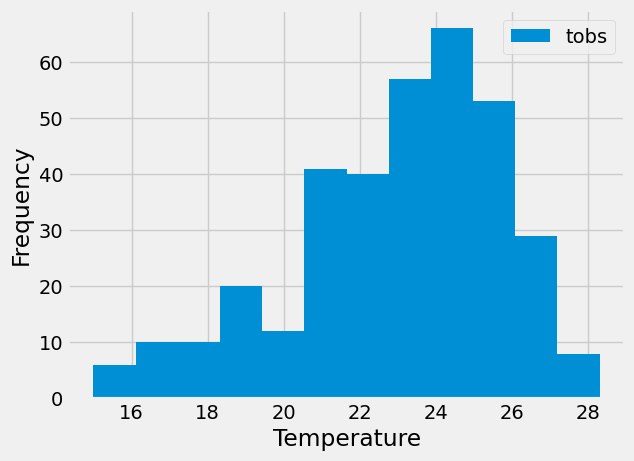

In [19]:
df1.hist(bins=12)
plt.ylabel('Frequency')
plt.xlabel('Temperature')
plt.title(None)
plt.legend(['tobs'])
plt.show()


# Close Session

In [20]:
# Close Session
session.close()